In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import norm

class Gaussian_Bandit:
    
    # Accept a list of K >= 2 floats, representing means of
    # Gaussian distributions for each bandit arm
    def __init__(self,means):
        self.bandit_means = means
        self.rand_regret = 0
        self.pseudo_rand_regret = 0
        self.best_mean = max(self.bandit_means)
    
    # Function that returns the number of bandit arms
    def K(self):
        return len(self.bandit_means)
    
    # Accepts a parameter 0 <= a <= K-1 and returns the
    # realization of random variable X with P(X=1) being the
    # mean of the (a+1)^th arm.
    def pull(self,a):
        selected_arm_mean = self.bandit_means[a]
        selected_arm_sample = norm.rvs(loc=selected_arm_mean,size=1)
        self.rand_regret = self.rand_regret + (self.best_mean - selected_arm_sample)
        self.pseudo_rand_regret = self.pseudo_rand_regret + (self.best_mean - selected_arm_sample)
        return selected_arm_sample
    
    # Returns the regret incurred so far.
    def random_regret(self):
        return self.rand_regret
    
    def pseudo_random_regret(self):
        return self.pseudo_rand_regret

In [52]:
def explore_then_commit_algorithm(bandit,n,m):
    
    # Implement a greedy algorithm for arm selection
    arm_values_sum = np.zeros((bandit.K(),1))
    arm_values_avg = np.zeros((bandit.K(),1))
    
    # First, test the value of each arm "m" times
    for i in range(bandit.K()):
        for j in range(m):
            arm_values_sum[i] = arm_values_sum[i] + bandit.pull(i)
        arm_values_avg[i] = (1/m)*(arm_values_sum[i]) 
    
    # NOTE: IN A REAL IMPLEMENTATION, WILL LIKELY 
    # HAVE AT LEAST ONE ARM WITH VALUE 1 AFTER A
    # SINGLE PULL -> SHOULD THEN RANDOMLY CHOOSE
    # BETWEEN THESE ARMS, I AM JUST PICKING THE
    # FIRST ONE THAT OBTAINED THE MAXIMUM VALUE
    
    # Second, exploit the arm with the best value
    optimal_arm = np.argmax(arm_values_avg)
    for i in range((n-bandit.K()*m)):
        arm_sample = bandit.pull(optimal_arm)
    
    return bandit.rand_regret
    

In [49]:
def compute_optimal_m(n,delta):
    
    # For a given horizon length and difference between
    # arm mean values, find the optimal number of times
    # to sample each of the arms ("m" total times each)
    # before committing to one of them.
    #
    # Equation 6.5 in the textbook
    #
    m = max(1,np.ceil(4/(delta**2)*np.log2((n*delta**2)/4)))
    return m

def compute_upper_bound(n,delta):

    # For a given horizon length and difference between
    # arm mean values, find the upper bound on the reg-
    # ret of the entire process
    R_n = min(n*delta,
                 delta+(4/delta)*(1+max(0,np.log2((n*delta**2)/4))))
    return R_n
    

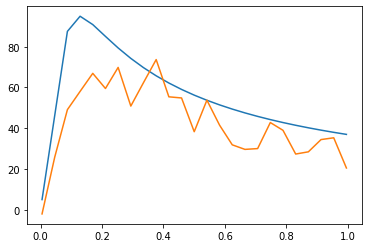

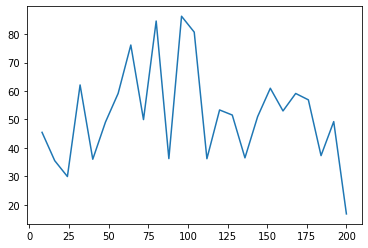

here


In [73]:
def main():
    
    # Step 1: Replicate Figure 6.1
    num_trials_to_avg = 25
    num_sample_points = 25
    n = 1000 # fixed parameter for time horizon
    regret_upper_bound_list = np.zeros((num_sample_points,))
    actual_regret_list = np.zeros((num_sample_points,))
    optimal_m_list = np.zeros((num_sample_points,))
    delta_values = np.linspace(0.005,0.995,num_sample_points)
    for i in range(num_sample_points):
        cur_delta = delta_values[i]
        optimal_m_list[i] = compute_optimal_m(n,cur_delta)
        regret_upper_bound_list[i] = compute_upper_bound(n,cur_delta)
        for j in range(num_trials_to_avg):
            current_bandit = Gaussian_Bandit([0,-cur_delta])
            actual_regret_list[i] = actual_regret_list[i] + \
                explore_then_commit_algorithm(current_bandit,n,int(optimal_m_list[i]))
    actual_regret_list_avg = (1/num_trials_to_avg)*(actual_regret_list[:])
    
    plt.figure()
    plt.plot(delta_values,regret_upper_bound_list)
    plt.plot(delta_values,actual_regret_list_avg)
    
    # Plot is noisy - but general shape appears similar.
    
    # Step 2: Replicate Figure 6.2
    n = 2000
    num_trials_to_avg = 25
    delta = 1/10
    tot_num_m_vals = 25
    m_values = np.array([8*i for i in range(1,tot_num_m_vals+1)])
    m_regret_list = np.zeros((tot_num_m_vals,))
    for i in range(tot_num_m_vals):
        for j in range(num_trials_to_avg):
            current_bandit = Gaussian_Bandit([0,-delta])
            m_regret_list[i] = m_regret_list[i] + \
                explore_then_commit_algorithm(current_bandit,n,int(m_values[i]))
    m_regret_list_avg = (1/num_trials_to_avg)*(m_regret_list[:])
    
    plt.figure()
    plt.plot(m_values,m_regret_list_avg)
    plt.show()
    
    # Don't know what I am doing wrong here.
    
if __name__ == "__main__":
    main()

In [62]:
import numpy as np

m = np.array([i for i in range(10)])
print(m)

[0 1 2 3 4 5 6 7 8 9]
